In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from hyperopt import hp
from hyperopt import fmin, tpe, STATUS_OK, STATUS_FAIL, Trials
warnings.filterwarnings('ignore')

In [42]:
data=pd.read_csv('C:/Users\ASUS\OneDrive\Documents\TECHNOCOLABS\Analysing-Credit-Risk-on-European-Peer-to-Peer-lending-Firm-Bandora\Bandora_cleaned.csv',low_memory=False)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   LoanDate                                77394 non-null  object 
 5   FirstPaymentDate                        77394 non-null  object 
 6   MaturityDate_Original                   77394 non-null  object 
 7   MaturityDate_Last                       77394 non-null  object 
 8   VerificationType                        77349 non-null  float64
 9   LanguageCode                            77394 non-null  object 
 10  Age                                     77394 non-null  in

In [44]:
data
c=['LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','LastPaymentOn']

In [45]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
cat_cols

Index(['NewCreditCustomer', 'LoanDate', 'FirstPaymentDate',
       'MaturityDate_Original', 'MaturityDate_Last', 'LanguageCode', 'Country',
       'County', 'City', 'UseOfLoan', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'LastPaymentOn', 'Rating', 'Restructured',
       'CreditScoreEsMicroL'],
      dtype='object')

In [46]:
data[cat_cols]

,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,LanguageCode,Country,County,City,UseOfLoan,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,LastPaymentOn,Rating,Restructured,CreditScoreEsMicroL
0,True,2009-06-16,2009-07-27,2010-06-25,2010-06-25,1,EE,HARJU,TALLINN,7,1.0,3.0,UpTo3Years,7.0,NaN,2010-07-06,missing,False,M
1,False,2009-06-15,2009-07-15,2009-07-15,2009-07-15,1,EE,IDA-VIRU,KOHTLA-JARVE,7,4.0,3.0,MoreThan5Years,16.0,NaN,2009-07-07,missing,False,M
2,True,2009-06-15,2009-07-27,2011-02-25,2014-05-13,1,EE,PÄRNU,PÄRNU,2,1.0,3.0,UpTo4Years,9.0,NaN,2012-10-01,missing,True,M
3,True,2009-06-15,2009-07-15,2010-09-15,2010-09-15,1,EE,HARJU,PALDISKI,notset,3.0,unknown,UpTo3Years,1.0,NaN,2010-09-15,missing,False,M
4,True,2009-06-14,2009-07-27,2010-06-25,2010-06-25,1,EE,TARTU,TARTU,6,2.0,3.0,UpTo3Years,7.0,NaN,2015-07-16,missing,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,True,2015-01-06,2015-03-02,2020-02-03,2020-02-03,4,FI,PÄIJÄT-HÄME,LAHTI,notset,3.0,3.0,MoreThan5Years,1.0,5.0,2019-02-12,E,False,M
77390,False,2015-01-06,2015-03-05,2020-02-05,2019-02-20,4,FI,POHJOIS KARJAALA,JOENSUU,2,3.0,3.0,MoreThan5Years,8.0,1.0,2019-02-07,B,False,M
77391,True,2015-01-06,2015-03-02,2020-02-03,2020-02-03,4,FI,VARSINAIS-SUOMI,SAUVO,notset,1.0,unknown,MoreThan5Years,6.0,1.0,2020-01-17,D,False,M
77392,False,2015-01-06,2015-03-02,2020-02-03,2020-08-03,1,EE,VALGA,VALGA,7,1.0,3.0,MoreThan5Years,17.0,4.0,2019-12-20,B,True,M


In [47]:
#finding high cardinality column means which have very much count of unique variable in column which is not efficient for encoding
cat_cols.tolist()
for i in cat_cols:
    print(data[i].value_counts())


True     48867
False    28527
Name: NewCreditCustomer, dtype: int64
2019-07-09    158
2019-07-10    136
2019-07-02    123
2019-08-06    123
2018-10-17    121
             ... 
2011-05-10      1
2011-05-17      1
2011-05-25      1
2011-06-02      1
2014-12-21      1
Name: LoanDate, Length: 3490, dtype: int64
2019-08-05    718
2019-11-04    516
2019-06-03    449
2019-06-18    347
2019-03-04    346
             ... 
2011-12-06      1
2011-12-01      1
2012-01-05      1
2012-02-27      1
2020-02-14      1
Name: FirstPaymentDate, Length: 2123, dtype: int64
2024-06-03    381
2024-05-20    339
2020-08-03    330
2022-07-04    299
2024-08-05    296
             ... 
2011-12-09      1
2015-02-06      1
2012-02-22      1
2014-08-04      1
2015-07-09      1
Name: MaturityDate_Original, Length: 3085, dtype: int64
2024-06-03    329
2024-05-20    289
2024-08-05    275
2020-08-03    249
2022-07-04    244
             ... 
2010-10-25      1
2012-05-11      1
2014-04-28      1
2014-05-19      1
2016-12-

In [48]:
#we can see that county,country,city have too much unique value 
#so i will delete it
data.drop(['County','Country','City'],axis=1,inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77394 entries, 0 to 77393
Data columns (total 45 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   BidsPortfolioManager                    77394 non-null  int64  
 1   BidsApi                                 77394 non-null  int64  
 2   BidsManual                              77394 non-null  float64
 3   NewCreditCustomer                       77394 non-null  bool   
 4   LoanDate                                77394 non-null  object 
 5   FirstPaymentDate                        77394 non-null  object 
 6   MaturityDate_Original                   77394 non-null  object 
 7   MaturityDate_Last                       77394 non-null  object 
 8   VerificationType                        77349 non-null  float64
 9   LanguageCode                            77394 non-null  object 
 10  Age                                     77394 non-null  in

In [50]:
cat_cols=data.select_dtypes(exclude=['int','float']).columns
data[cat_cols]#run cat_cols above cell

,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,LanguageCode,UseOfLoan,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,LastPaymentOn,Rating,Restructured,CreditScoreEsMicroL
0,True,2009-06-16,2009-07-27,2010-06-25,2010-06-25,1,7,1.0,3.0,UpTo3Years,7.0,NaN,2010-07-06,missing,False,M
1,False,2009-06-15,2009-07-15,2009-07-15,2009-07-15,1,7,4.0,3.0,MoreThan5Years,16.0,NaN,2009-07-07,missing,False,M
2,True,2009-06-15,2009-07-27,2011-02-25,2014-05-13,1,2,1.0,3.0,UpTo4Years,9.0,NaN,2012-10-01,missing,True,M
3,True,2009-06-15,2009-07-15,2010-09-15,2010-09-15,1,notset,3.0,unknown,UpTo3Years,1.0,NaN,2010-09-15,missing,False,M
4,True,2009-06-14,2009-07-27,2010-06-25,2010-06-25,1,6,2.0,3.0,UpTo3Years,7.0,NaN,2015-07-16,missing,False,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,True,2015-01-06,2015-03-02,2020-02-03,2020-02-03,4,notset,3.0,3.0,MoreThan5Years,1.0,5.0,2019-02-12,E,False,M
77390,False,2015-01-06,2015-03-05,2020-02-05,2019-02-20,4,2,3.0,3.0,MoreThan5Years,8.0,1.0,2019-02-07,B,False,M
77391,True,2015-01-06,2015-03-02,2020-02-03,2020-02-03,4,notset,1.0,unknown,MoreThan5Years,6.0,1.0,2020-01-17,D,False,M
77392,False,2015-01-06,2015-03-02,2020-02-03,2020-08-03,1,7,1.0,3.0,MoreThan5Years,17.0,4.0,2019-12-20,B,True,M


<AxesSubplot:xlabel='NewCreditCustomer', ylabel='count'>

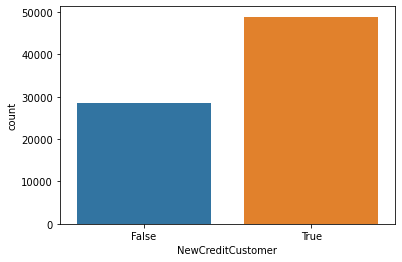

In [51]:
sns.countplot(data["NewCreditCustomer"], order=data["NewCreditCustomer"].value_counts(ascending=True).index)

In [52]:
a=cat_cols.tolist()
a

['NewCreditCustomer',
 'LoanDate',
 'FirstPaymentDate',
 'MaturityDate_Original',
 'MaturityDate_Last',
 'LanguageCode',
 'UseOfLoan',
 'MaritalStatus',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'OccupationArea',
 'HomeOwnershipType',
 'LastPaymentOn',
 'Rating',
 'Restructured',
 'CreditScoreEsMicroL']

<AxesSubplot:ylabel='None'>

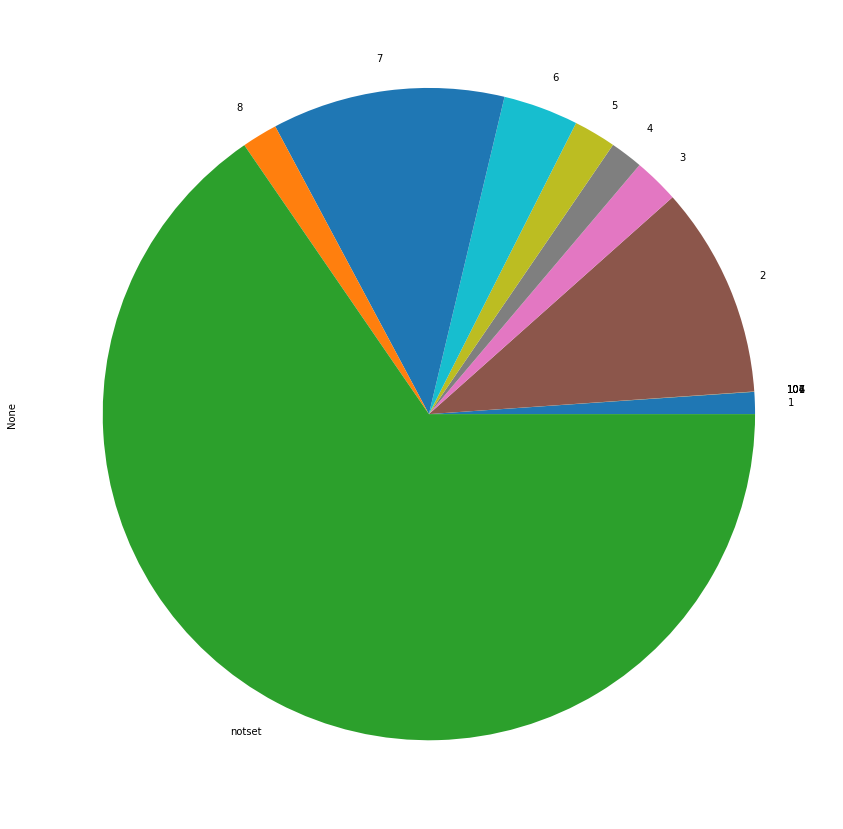

In [53]:
plt.figure(figsize = (15,15))
data.UseOfLoan.str.get_dummies(sep = ",").sum().plot.pie()

<AxesSubplot:ylabel='None'>

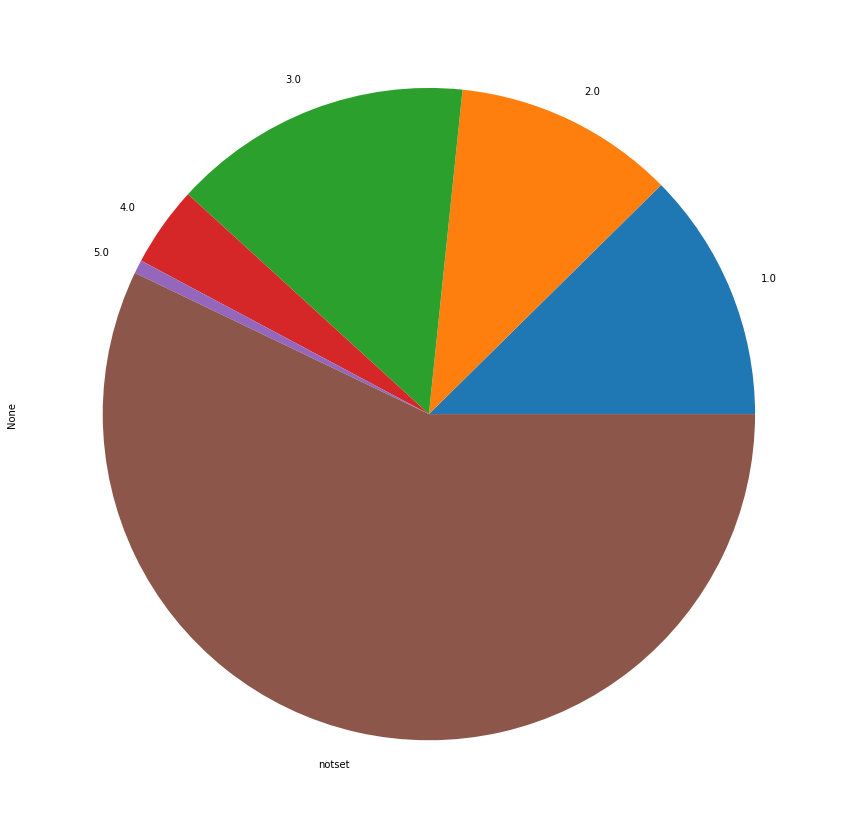

In [54]:
plt.figure(figsize = (15,15))
data.MaritalStatus.str.get_dummies(sep = ",").sum().plot.pie()

<AxesSubplot:ylabel='None'>

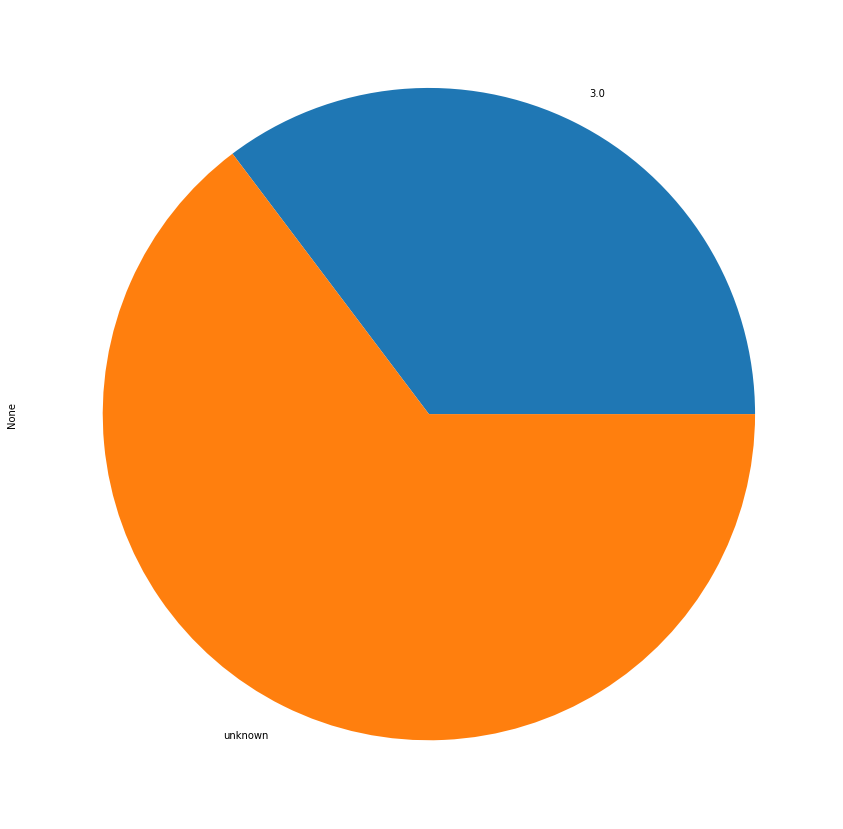

In [55]:
plt.figure(figsize = (15,15))
data.EmploymentStatus.str.get_dummies(sep = ",").sum().plot.pie()

<AxesSubplot:ylabel='None'>

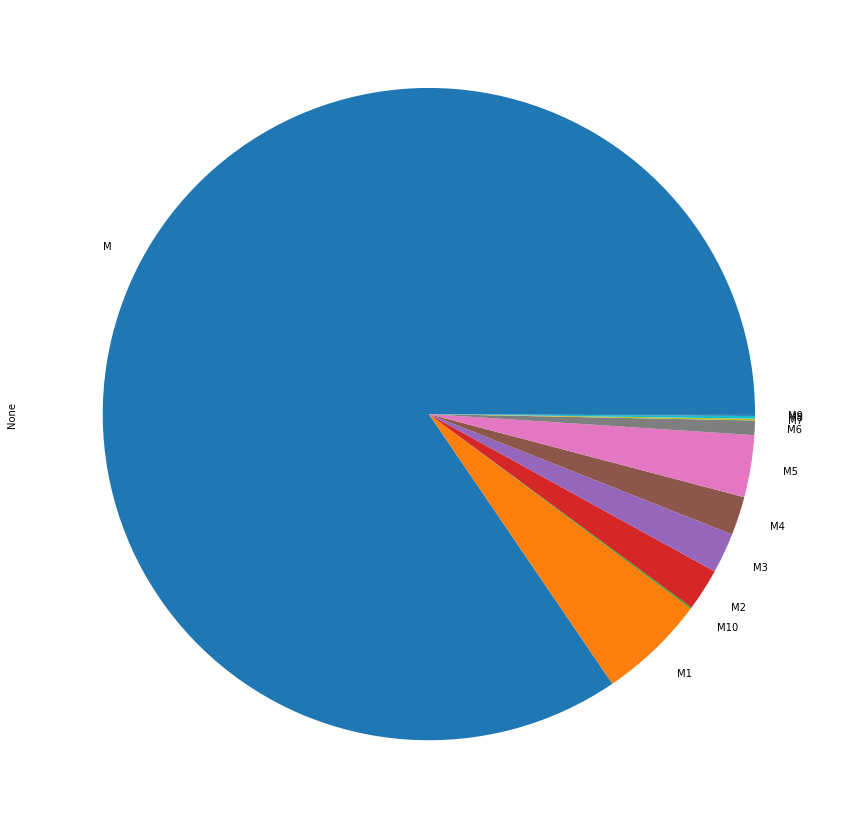

In [56]:
plt.figure(figsize = (15,15))
data.CreditScoreEsMicroL.str.get_dummies(sep = ",").sum().plot.pie()

<AxesSubplot:ylabel='None'>

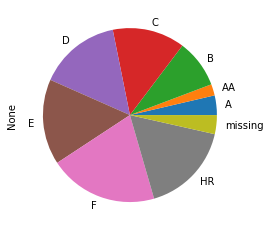

In [57]:
data.Rating.str.get_dummies(sep = ",").sum().plot.pie()

In [58]:
#missing value is very less as compared to other value so we will convert it into any value but mode should be little fare
data['Rating'] = data['Rating'].replace('missing','D')

<AxesSubplot:ylabel='None'>

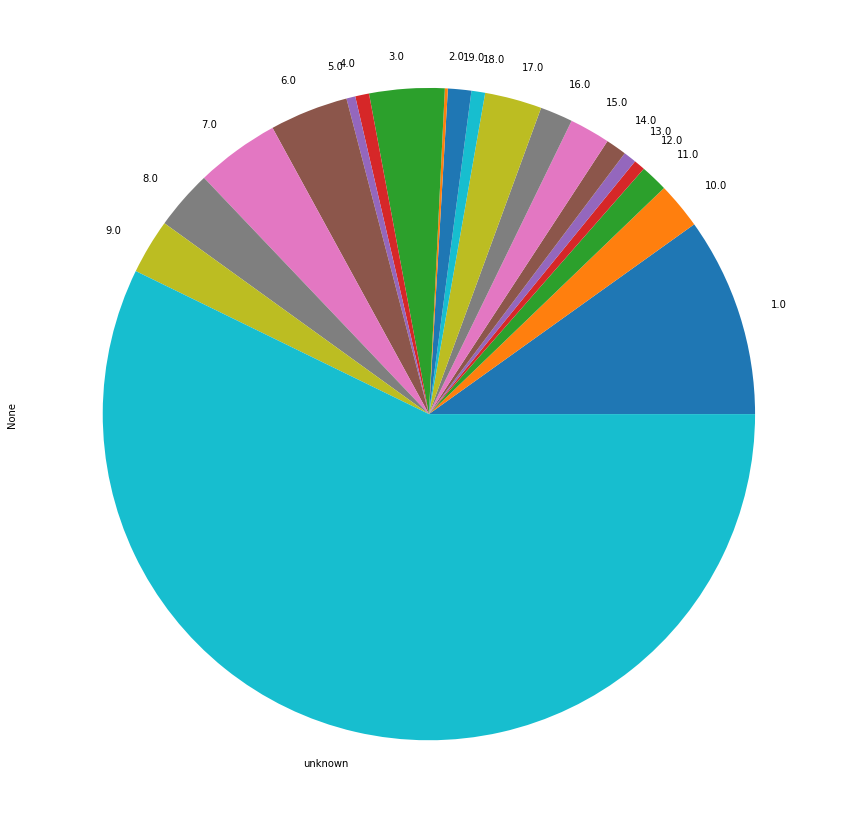

In [59]:
plt.figure(figsize = (15,15))
data.OccupationArea.str.get_dummies(sep = ",").sum().plot.pie()

<AxesSubplot:ylabel='None'>

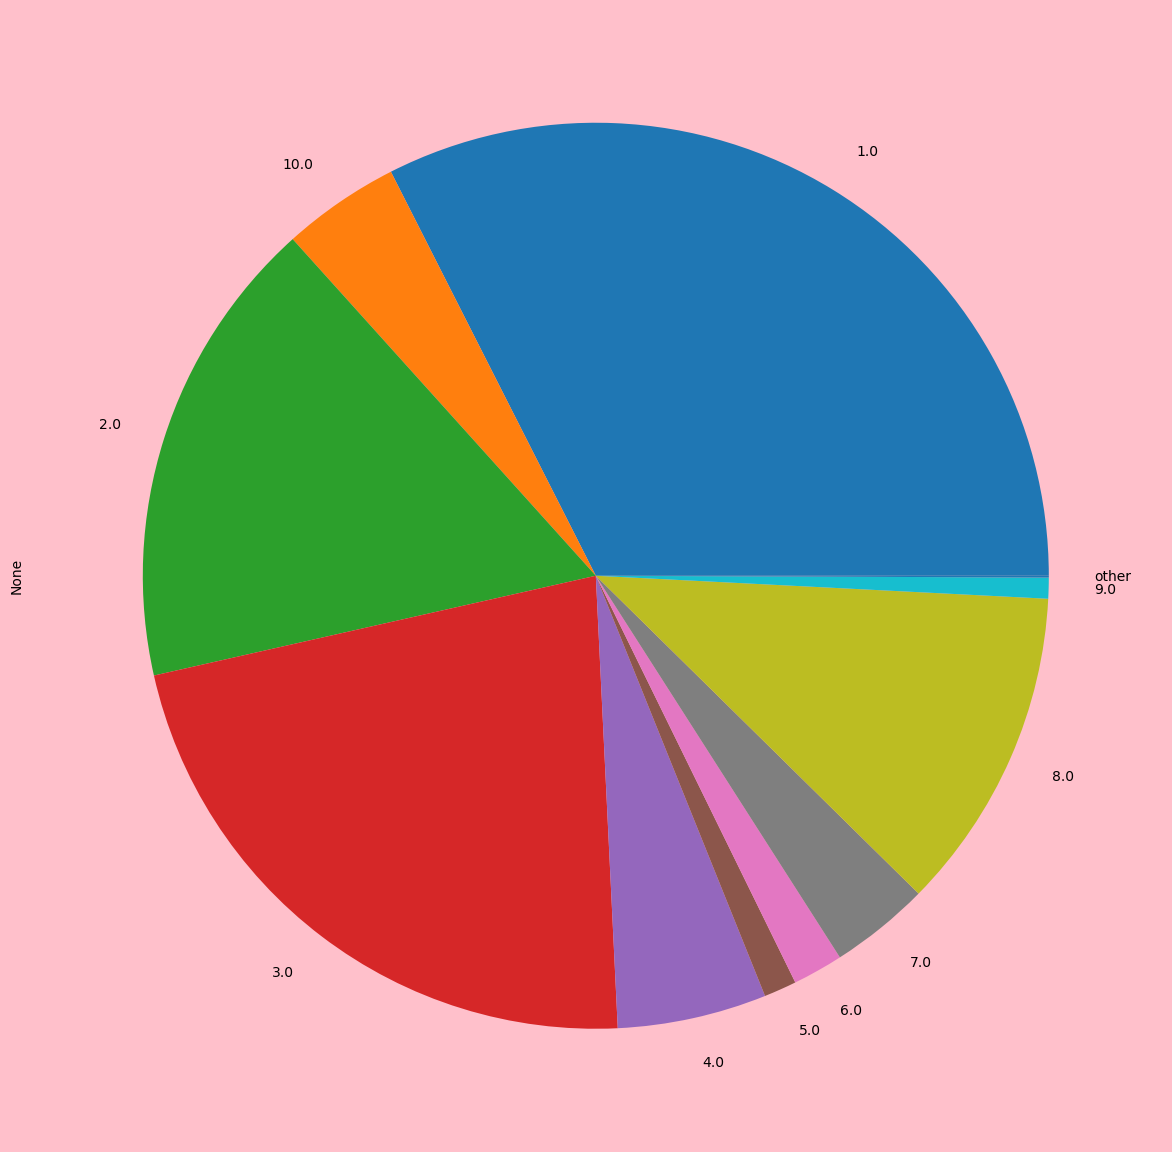

In [60]:
plt.figure(figsize=(15,15),dpi=100,facecolor='pink',edgecolor='pink')
data.HomeOwnershipType.str.get_dummies(sep = ",").sum().plot.pie()

In [61]:
#here other is very less so we will count in 1 as it is very high
data['HomeOwnershipType'] = data['HomeOwnershipType'].replace('other',1.0)

<AxesSubplot:ylabel='None'>

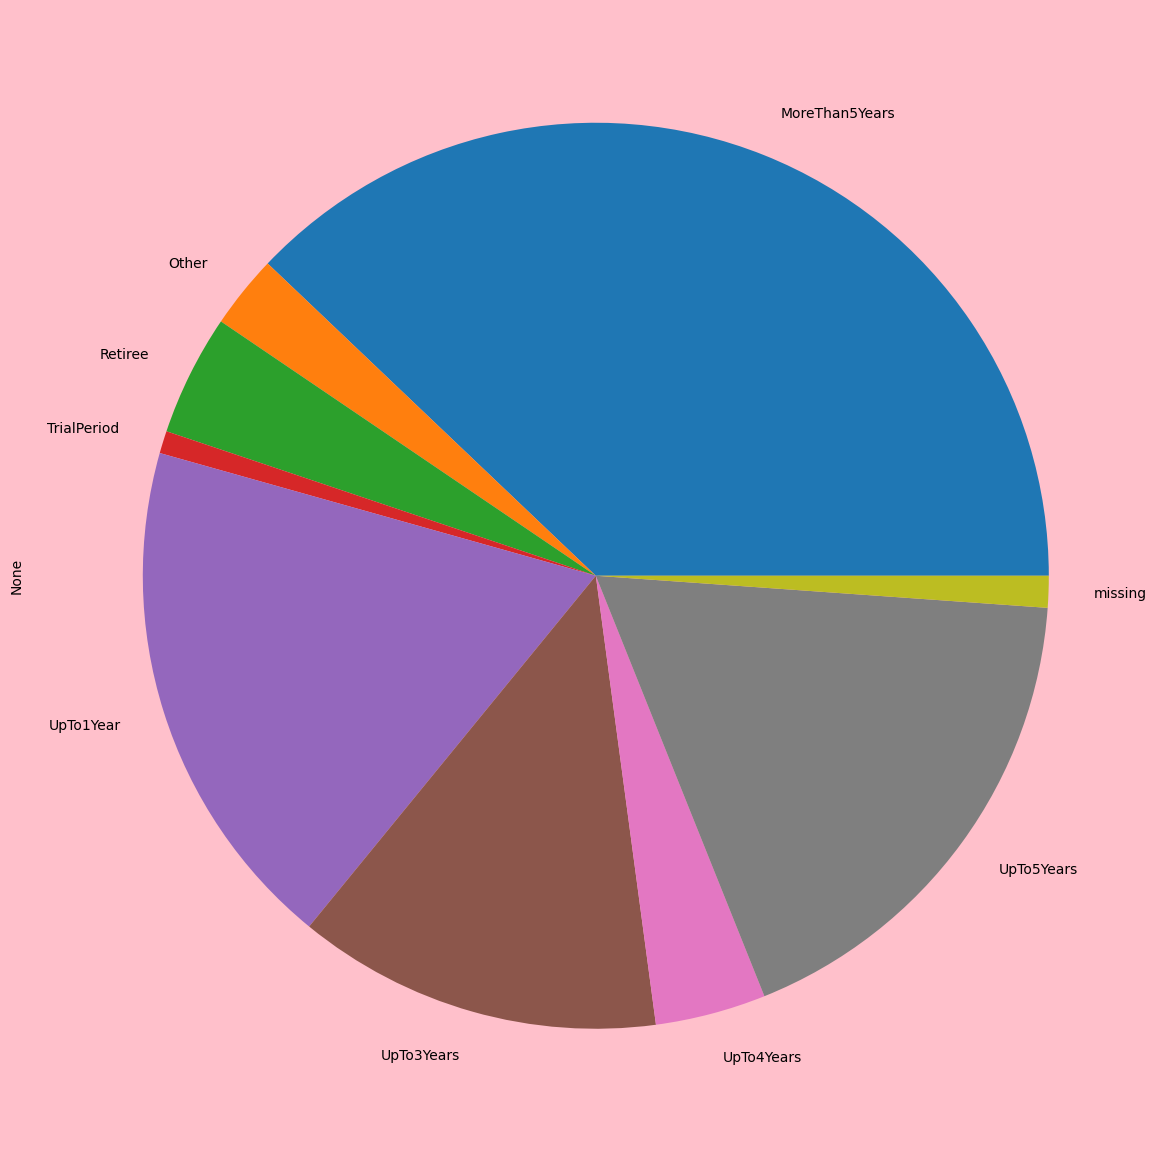

In [62]:
plt.figure(figsize=(15,15),dpi=100,facecolor='pink',edgecolor='pink')
data.EmploymentDurationCurrentEmployer.str.get_dummies(sep = ",").sum().plot.pie()

In [63]:
#missing is very less so i will add it to other so after onehot encoding we will get less feature

In [64]:
data['EmploymentDurationCurrentEmployer'] = data['EmploymentDurationCurrentEmployer'].replace('missing','Other')

# splitting data

In [65]:
#create x,y
X=data.drop('Default',axis=1)
y=data['Default']

In [66]:
y.unique()

array([0, 1], dtype=int64)

In [67]:
#class imbalance
#y =y.map({'Late':1,'Repaid':2,'Current':3})
y.value_counts(normalize=True)

1    0.552937
0    0.447063
Name: Default, dtype: float64

Manually tuning all the hyperparameters and finding the right values to build the best model is very difficult. For this reason we use an automatic hyperparameter tuning package called Hyperopt. Hyperopt is a Distributed Asynchronous Hyperparameters Optimization package written in Python.

In [68]:
data

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,LoanDate,FirstPaymentDate,MaturityDate_Original,MaturityDate_Last,VerificationType,LanguageCode,...,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default
0,0,0,115.0410,True,2009-06-16,2009-07-27,2010-06-25,2010-06-25,2.0,1,...,M,1000.0,115.0408,20.4222,0.00,0.00,1,83.0852,0,0
1,0,0,140.6057,False,2009-06-15,2009-07-15,2009-07-15,2009-07-15,2.0,1,...,M,1000.0,140.6057,2.0227,0.00,0.00,2,255.6467,0,0
2,0,0,319.5580,True,2009-06-15,2009-07-27,2011-02-25,2014-05-13,2.0,1,...,M,1000.0,203.1909,59.7626,116.35,414.07,0,0.0000,0,1
3,0,0,57.5205,True,2009-06-15,2009-07-15,2010-09-15,2010-09-15,2.0,1,...,M,1000.0,57.5205,18.7323,0.00,0.00,1,134.2144,0,0
4,0,0,319.5582,True,2009-06-14,2009-07-27,2010-06-25,2010-06-25,2.0,1,...,M,1000.0,319.5436,220.4200,0.00,0.00,1,146.9966,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,True,2015-01-06,2015-03-02,2020-02-03,2020-02-03,3.0,4,...,M,1000.0,2308.1900,0.0000,0.00,0.00,0,0.0000,0,1
77390,1880,0,1120.0000,False,2015-01-06,2015-03-05,2020-02-05,2019-02-20,3.0,4,...,M,1000.0,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,0
77391,1975,0,525.0000,True,2015-01-06,2015-03-02,2020-02-03,2020-02-03,1.0,4,...,M,1000.0,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,1
77392,1840,0,1160.0000,False,2015-01-06,2015-03-02,2020-02-03,2020-08-03,4.0,1,...,M,1000.0,2257.5400,561.5300,0.00,0.00,1,500.0000,0,1


In [69]:
data.drop(c,axis=1,inplace=True)

In [70]:
c=['LoanDate','FirstPaymentDate','MaturityDate_Original','MaturityDate_Last','LastPaymentOn']
for i in c:
    X.drop(i,axis=1,inplace=True)

# MUTUAL INFORMATION

In [71]:
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [72]:
X

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,...,Restructured,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,0,0,115.0410,True,2.0,0,61,1.0,319.5582,115.0408,...,False,0,1000.0,115.0408,20.4222,0.00,0.00,1,83.0852,0
1,0,0,140.6057,False,2.0,0,48,1.0,191.7349,140.6057,...,False,0,1000.0,140.6057,2.0227,0.00,0.00,2,255.6467,0
2,0,0,319.5580,True,2.0,0,58,1.0,319.5582,319.5409,...,True,0,1000.0,203.1909,59.7626,116.35,414.07,0,0.0000,0
3,0,0,57.5205,True,2.0,0,23,1.0,127.8233,57.5205,...,False,0,1000.0,57.5205,18.7323,0.00,0.00,1,134.2144,0
4,0,0,319.5582,True,2.0,0,25,1.0,319.5582,319.5436,...,False,0,1000.0,319.5436,220.4200,0.00,0.00,1,146.9966,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,True,3.0,2,37,0.0,3000.0000,3000.0000,...,False,0,1000.0,2308.1900,0.0000,0.00,0.00,0,0.0000,0
77390,1880,0,1120.0000,False,3.0,2,35,0.0,3000.0000,3000.0000,...,False,0,1000.0,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0
77391,1975,0,525.0000,True,1.0,2,40,0.0,2500.0000,2500.0000,...,False,0,1000.0,1869.7600,199.3300,630.24,1227.98,0,0.0000,0
77392,1840,0,1160.0000,False,4.0,0,47,1.0,3000.0000,3000.0000,...,True,0,1000.0,2257.5400,561.5300,0.00,0.00,1,500.0000,0


In [73]:
X['DebtToIncome']=X['DebtToIncome'].fillna(X['DebtToIncome'].median())
#X['LogFreeCash']=X['LogFreeCash'].fillna(X['LogFreeCash'].median())

In [74]:
b=['VerificationType', 'Gender', 'Education']      
for i in b:
    X[i]=X[i].fillna(X[i].mode()[0])

In [75]:

X['FreeCash']=X['FreeCash'].fillna(X['FreeCash'].median())

In [76]:
# All discrete features should now have integer dtypes (double-check this before using MI!)

discrete_features = X.dtypes == int

In [77]:
discrete_features

BidsPortfolioManager                      False
BidsApi                                   False
BidsManual                                False
NewCreditCustomer                         False
VerificationType                          False
LanguageCode                              False
Age                                       False
Gender                                    False
AppliedAmount                             False
Amount                                    False
Interest                                  False
LoanDuration                              False
MonthlyPayment                            False
UseOfLoan                                 False
Education                                 False
MaritalStatus                             False
EmploymentStatus                          False
EmploymentDurationCurrentEmployer         False
OccupationArea                            False
HomeOwnershipType                         False
IncomeTotal                             

In [78]:
# from sklearn.feature_selection import mutual_info_classif

# def make_mi_scores(X, y, discrete_features):
#     mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
#     mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
#     mi_scores = mi_scores.sort_values(ascending=False)
#     return mi_scores

# mi_scores = make_mi_scores(X, y, discrete_features)

In [79]:
# mi_scores 

In [80]:
# #plot for MI
# def plot_mi_scores(scores):
#     scores = scores.sort_values(ascending=True)
#     width = np.arange(len(scores))
#     ticks = list(scores.index)
#     plt.barh(width, scores)
#     plt.yticks(width, ticks)
#     plt.title("Mutual Information Scores")


# plt.figure(dpi=100, figsize=(15, 10))
# plot_mi_scores(mi_scores)

we can easly see most important feature from above plot

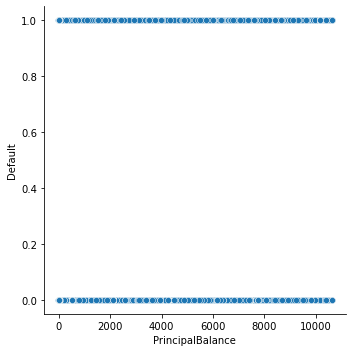

In [81]:
#plot for high MI
sns.relplot(x=X['PrincipalBalance'], y=y)

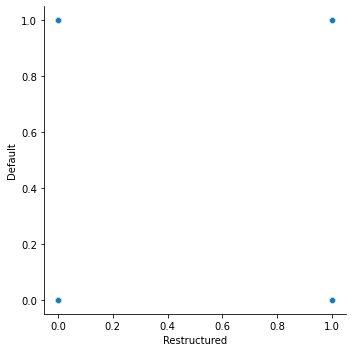

In [82]:
#have very less MI just see plot

sns.relplot(x=X['Restructured'], y=y)

We can see their have not any relationship 

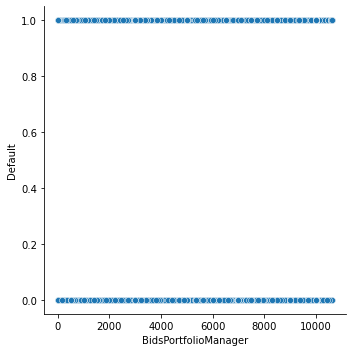

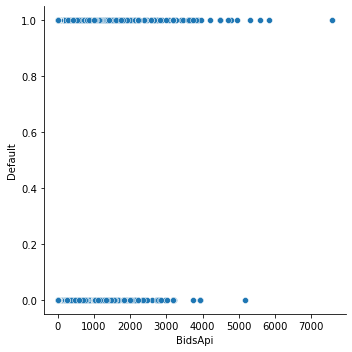

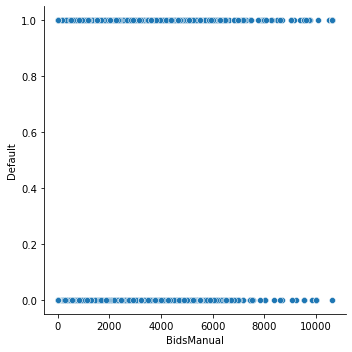

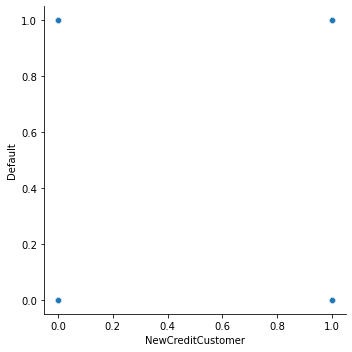

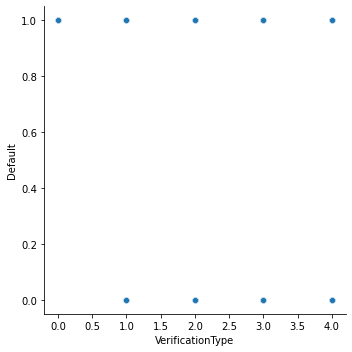

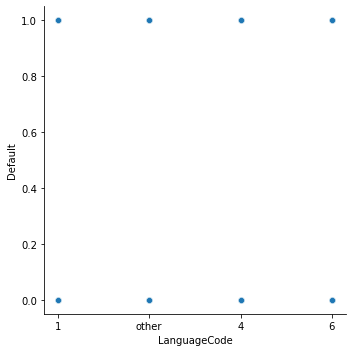

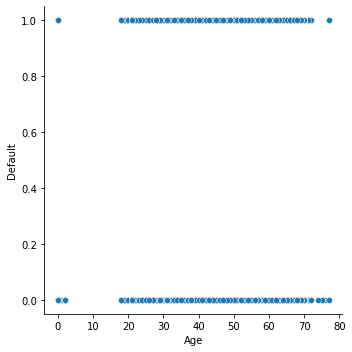

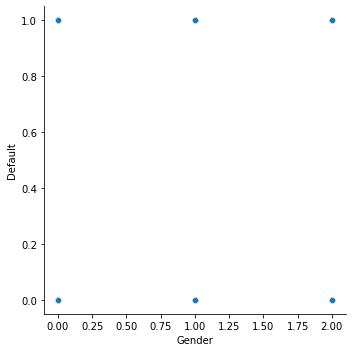

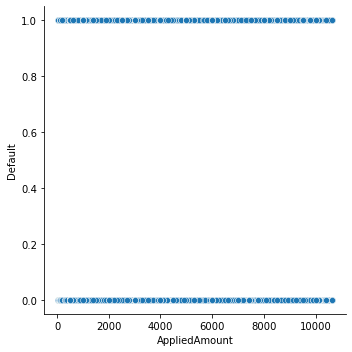

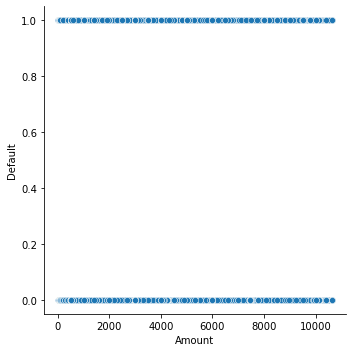

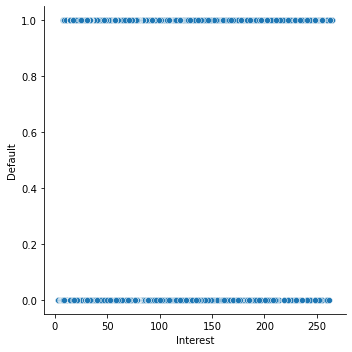

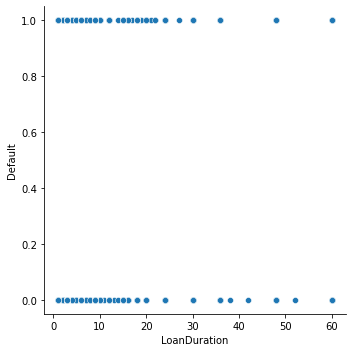

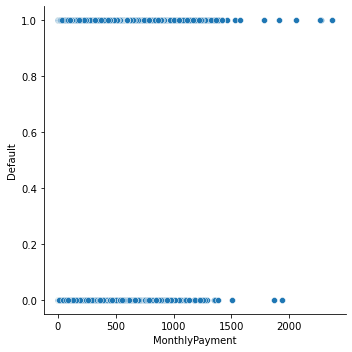

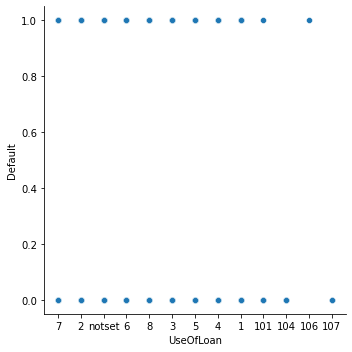

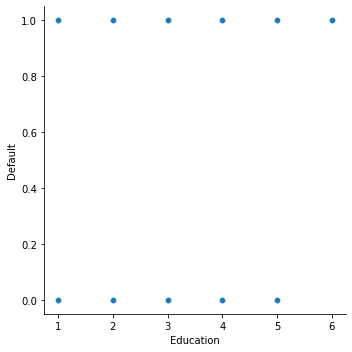

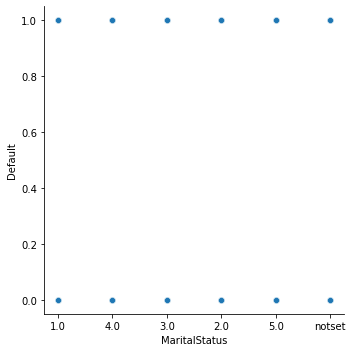

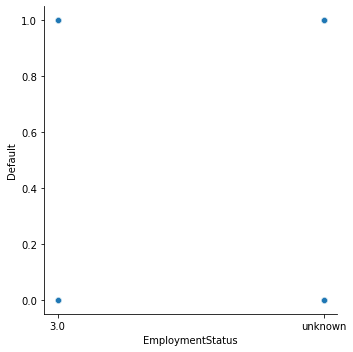

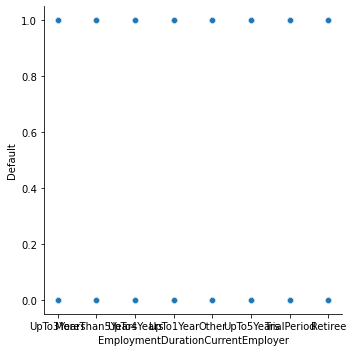

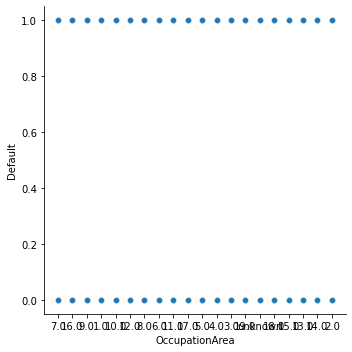

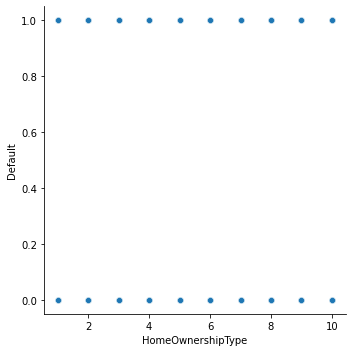

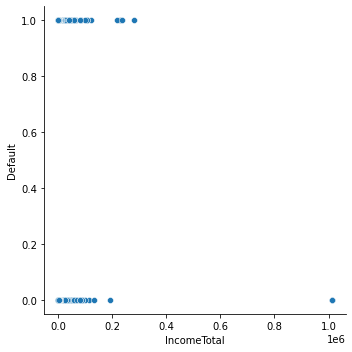

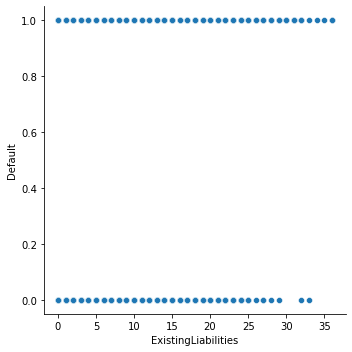

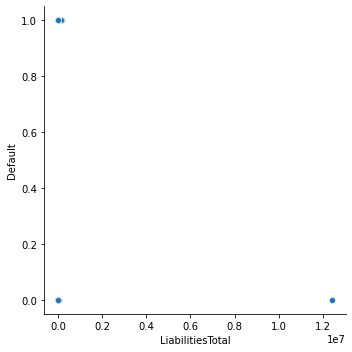

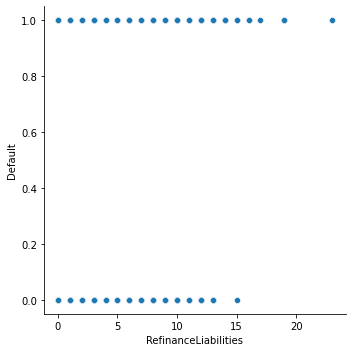

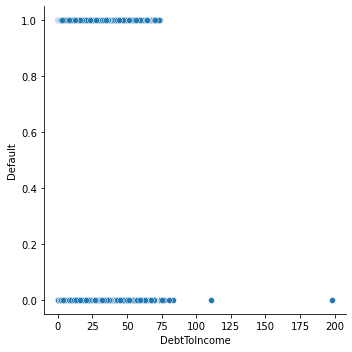

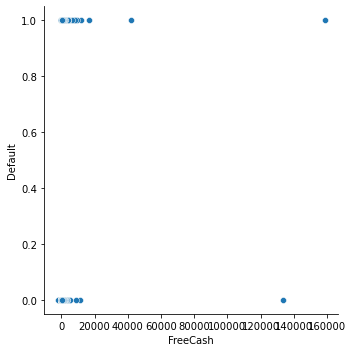

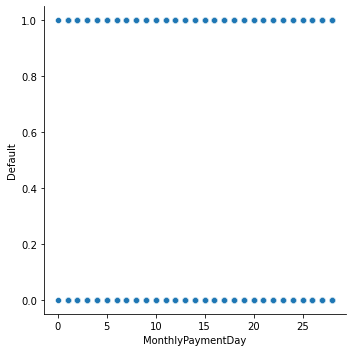

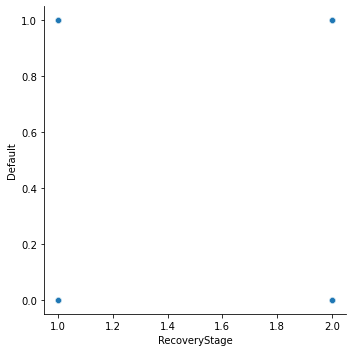

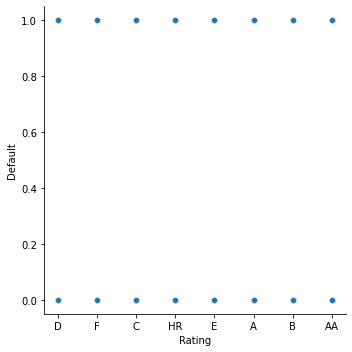

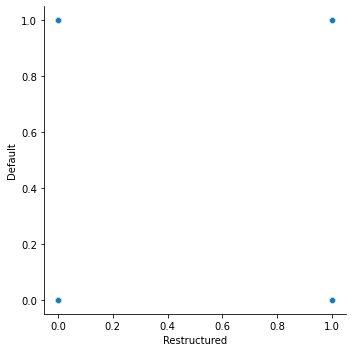

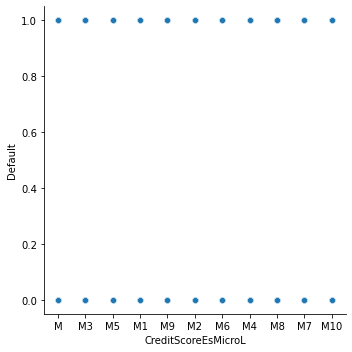

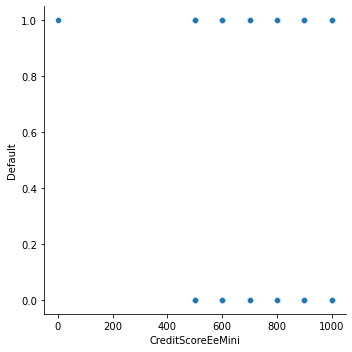

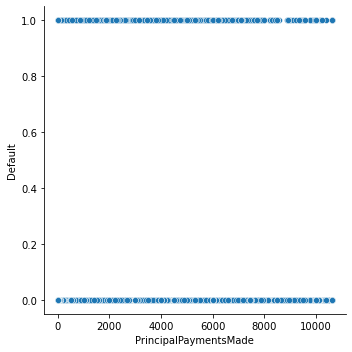

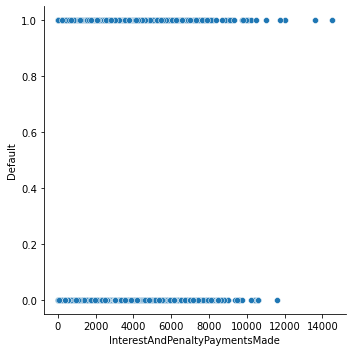

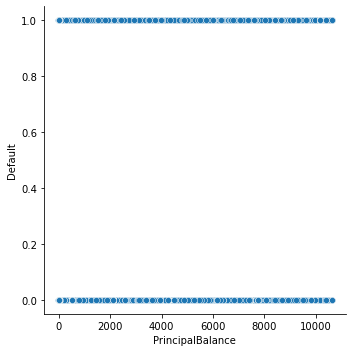

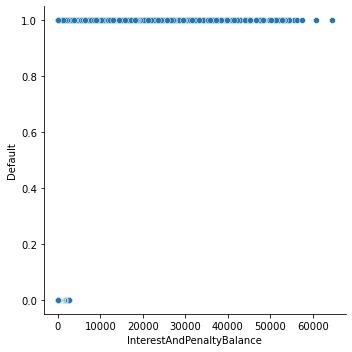

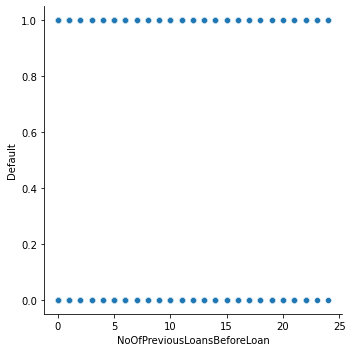

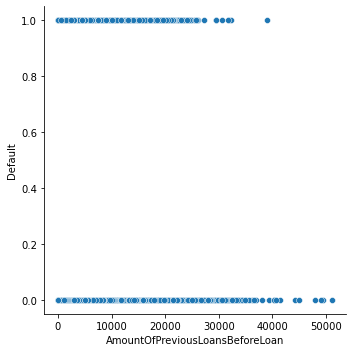

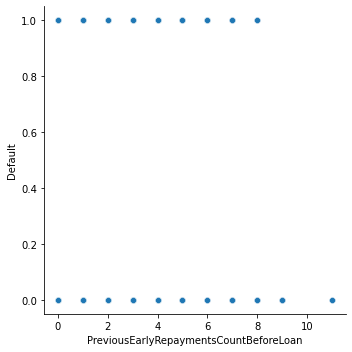

In [83]:
#X.drop('LastPaymentOn',axis=1,inplace=True)
for i in X.columns:
    sns.relplot(x=i, y=y,data=data)
    plt.show()

In [84]:
#lets create a rate column
#rate=Interest*100/PrincipalBalance*LoanDuration
X['Rate']=(X.Interest*100)/(X.PrincipalBalance*X.LoanDuration)

In [85]:
X['Rate']

0             inf
1             inf
2        1.074345
3             inf
4             inf
           ...   
77389         inf
77390         inf
77391    0.065663
77392         inf
77393    0.033310
Name: Rate, Length: 77394, dtype: float64

In [86]:
# #finding Mi scores
# discrete_features = X.dtypes == int
# make_mi_scores(X, y, discrete_features)
  

In [87]:
#we can see that Rate has very high MI that will help model to learn

In [88]:
num_cols=data.select_dtypes(include=['int','float']).columns
num_cols

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'VerificationType',
       'Age', 'Gender', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'Education', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'RecoveryStage', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Default'],
      dtype='object')

In [89]:
#change some column datatype
new_cat_col=['VerificationType','RecoveryStage','Education']
for i in new_cat_col:
    X[i]=pd.Categorical(X[i])
X[new_cat_col]


,VerificationType,RecoveryStage,Education
0,2.0,2.0,3.0
1,2.0,2.0,5.0
2,2.0,2.0,4.0
3,2.0,2.0,2.0
4,2.0,2.0,4.0
...,...,...,...
77389,3.0,2.0,3.0
77390,3.0,1.0,3.0
77391,1.0,2.0,3.0
77392,4.0,2.0,5.0


In [90]:
num_cols=X.select_dtypes(include=['int','float']).columns
num_cols

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'LanguageCode', 'Age',
       'Gender', 'AppliedAmount', 'Amount', 'Interest', 'LoanDuration',
       'MonthlyPayment', 'UseOfLoan', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'Rating', 'CreditScoreEsMicroL',
       'CreditScoreEeMini', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Rate'],
      dtype='object')

In [91]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
# BidsPortfolioManager', 'BidsApi' 'BidsManual Interest MonthlyPayment IncomeTotal ExistingLiabilities RefinanceLiabilities
#FreeCash  InterestAndPenaltyPaymentsMade PreviousEarlyRepaymentsCountBeforeLoan
# X["LogBidsPortfolioManager"] = X.BidsPortfolioManager.apply(np.log1p)
# X["LogBidsApi"] = X.BidsApi.apply(np.log1p)
# X["LogBidsManual"] = X.BidsManual.apply(np.log1p)
# X["LogInterest"] = X.Interest.apply(np.log1p)
# X["LogMonthlyPayment"] = X.MonthlyPayment.apply(np.log1p)
# X["LogIncomeTotal"] = X.IncomeTotal.apply(np.log1p)
# X["LogExistingLiabilities"] = X.ExistingLiabilities.apply(np.log1p)
# X["LogRefinanceLiabilities"] = X.RefinanceLiabilities.apply(np.log1p)
# X["LogFreeCash"] = X.FreeCash.apply(np.log1p)
# X["LogInterestAndPenaltyPaymentsMade"] = X.InterestAndPenaltyPaymentsMade.apply(np.log1p)
# X["LogPreviousEarlyRepaymentsCountBeforeLoan"] = X.PreviousEarlyRepaymentsCountBeforeLoan.apply(np.log1p)


In [92]:
# X["LogRate"] = X.Rate.apply(np.log1p)

In [93]:
# l=['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'MonthlyPayment', 'ExistingLiabilities', 'RefinanceLiabilities'
#    ,'FreeCash','InterestAndPenaltyPaymentsMade', 'PreviousEarlyRepaymentsCountBeforeLoan','Rate']
# for i in l:
#     X.drop(i,axis=1,inplace=True)

In [94]:
X

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,AppliedAmount,Amount,...,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Rate
0,0,0,115.0410,True,2.0,0,61,1.0,319.5582,115.0408,...,0,1000.0,115.0408,20.4222,0.00,0.00,1,83.0852,0,inf
1,0,0,140.6057,False,2.0,0,48,1.0,191.7349,140.6057,...,0,1000.0,140.6057,2.0227,0.00,0.00,2,255.6467,0,inf
2,0,0,319.5580,True,2.0,0,58,1.0,319.5582,319.5409,...,0,1000.0,203.1909,59.7626,116.35,414.07,0,0.0000,0,1.074345
3,0,0,57.5205,True,2.0,0,23,1.0,127.8233,57.5205,...,0,1000.0,57.5205,18.7323,0.00,0.00,1,134.2144,0,inf
4,0,0,319.5582,True,2.0,0,25,1.0,319.5582,319.5436,...,0,1000.0,319.5436,220.4200,0.00,0.00,1,146.9966,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,True,3.0,2,37,0.0,3000.0000,3000.0000,...,0,1000.0,2308.1900,0.0000,0.00,0.00,0,0.0000,0,inf
77390,1880,0,1120.0000,False,3.0,2,35,0.0,3000.0000,3000.0000,...,0,1000.0,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,inf
77391,1975,0,525.0000,True,1.0,2,40,0.0,2500.0000,2500.0000,...,0,1000.0,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,0.065663
77392,1840,0,1160.0000,False,4.0,0,47,1.0,3000.0000,3000.0000,...,0,1000.0,2257.5400,561.5300,0.00,0.00,1,500.0000,0,inf


In [95]:
X.isnull().sum()

BidsPortfolioManager                      0
BidsApi                                   0
BidsManual                                0
NewCreditCustomer                         0
VerificationType                          0
LanguageCode                              0
Age                                       0
Gender                                    0
AppliedAmount                             0
Amount                                    0
Interest                                  0
LoanDuration                              0
MonthlyPayment                            0
UseOfLoan                                 0
Education                                 0
MaritalStatus                             0
EmploymentStatus                          0
EmploymentDurationCurrentEmployer         0
OccupationArea                            0
HomeOwnershipType                         0
IncomeTotal                               0
ExistingLiabilities                       0
LiabilitiesTotal                

In [96]:
# a=['LogInterest','LogMonthlyPayment','LogRate']
# for i in a:
#     sns.boxplot(x=X[i])
#     plt.show()
# for i in a:
#     X[i]=X[i].fillna(X[i].median())

In [97]:
# we have seen that numerical columns have high number of outliers
# deal with each column seperately

# define custom functiion for median imputation
def median_outlier_imputation(feature):
    q1 = feature.quantile(0.25)
    q3 = feature.quantile(0.75)
    iqr = q3 - q1
    lower_tail = q1 - 1.5*iqr
    upper_tail = q3 + 1.5*iqr
    med = np.median(feature)
    for i in feature:
        if i > upper_tail or i < lower_tail:
            feature = feature.replace(i, med)
    return feature

In [98]:
# for i in a:
#     X[i] = median_outlier_imputation(X[i])

In [99]:
d=X.copy()

In [100]:
cat_cols=['NewCreditCustomer','VerificationType','LanguageCode','Gender','UseOfLoan','Education','MaritalStatus','EmploymentStatus','OccupationArea',
'HomeOwnershipType','RecoveryStage','Rating','Restructured','CreditScoreEsMicroL']
for i in cat_cols:
    X[i]=X[i].astype('category')

In [101]:
num_cols=X.select_dtypes(include=['int','float']).columns
num_cols

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'Age', 'AppliedAmount',
       'Amount', 'Interest', 'LoanDuration', 'MonthlyPayment',
       'EmploymentDurationCurrentEmployer', 'IncomeTotal',
       'ExistingLiabilities', 'LiabilitiesTotal', 'RefinanceLiabilities',
       'DebtToIncome', 'FreeCash', 'MonthlyPaymentDay', 'CreditScoreEeMini',
       'PrincipalPaymentsMade', 'InterestAndPenaltyPaymentsMade',
       'PrincipalBalance', 'InterestAndPenaltyBalance',
       'NoOfPreviousLoansBeforeLoan', 'AmountOfPreviousLoansBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Rate'],
      dtype='object')

In [102]:
X[num_cols]

,BidsPortfolioManager,BidsApi,BidsManual,Age,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,EmploymentDurationCurrentEmployer,...,MonthlyPaymentDay,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Rate
0,0,0,115.0410,61,319.5582,115.0408,30.00,12,101.13,0,...,25,1000.0,115.0408,20.4222,0.00,0.00,1,83.0852,0,inf
1,0,0,140.6057,48,191.7349,140.6057,25.00,1,101.13,1,...,15,1000.0,140.6057,2.0227,0.00,0.00,2,255.6467,0,inf
2,0,0,319.5580,58,319.5582,319.5409,25.00,20,101.13,2,...,25,1000.0,203.1909,59.7626,116.35,414.07,0,0.0000,0,1.074345
3,0,0,57.5205,23,127.8233,57.5205,45.00,15,101.13,0,...,15,1000.0,57.5205,18.7323,0.00,0.00,1,134.2144,0,inf
4,0,0,319.5582,25,319.5582,319.5436,30.00,12,101.13,0,...,25,1000.0,319.5436,220.4200,0.00,0.00,1,146.9966,0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77389,2515,0,485.0000,37,3000.0000,3000.0000,31.01,60,107.68,1,...,1,1000.0,2308.1900,0.0000,0.00,0.00,0,0.0000,0,inf
77390,1880,0,1120.0000,35,3000.0000,3000.0000,18.25,60,85.33,1,...,7,1000.0,3000.0000,1990.0300,0.00,0.00,1,3000.0000,0,inf
77391,1975,0,525.0000,40,2500.0000,2500.0000,24.83,60,80.42,1,...,1,1000.0,1869.7600,199.3300,630.24,1227.98,0,0.0000,0,0.065663
77392,1840,0,1160.0000,47,3000.0000,3000.0000,17.74,60,84.51,1,...,1,1000.0,2257.5400,561.5300,0.00,0.00,1,500.0000,0,inf


In [103]:
final=X.join(y)
final.to_csv('classifier_data.csv',index=False)

In [100]:
X.dtypes

BidsPortfolioManager                         int64
BidsApi                                      int64
BidsManual                                 float64
NewCreditCustomer                         category
VerificationType                          category
LanguageCode                              category
Age                                          int64
Gender                                    category
AppliedAmount                              float64
Amount                                     float64
Interest                                   float64
LoanDuration                                 int64
MonthlyPayment                             float64
UseOfLoan                                 category
Education                                 category
MaritalStatus                             category
EmploymentStatus                          category
EmploymentDurationCurrentEmployer            int64
OccupationArea                            category
HomeOwnershipType              

In [101]:
np.where(np.isnan(X[num_cols]))

(array([], dtype=int64), array([], dtype=int64))

In [102]:
for i in X.select_dtypes(exclude=['int','float']):
  print(X[i].unique())
  print('---'*12)

[True, False]
Categories (2, object): [False, True]
------------------------------------
[2.0, 4.0, 1.0, 3.0, 0.0]
Categories (5, float64): [0.0, 1.0, 2.0, 3.0, 4.0]
------------------------------------
[0, 1, 2, 3]
Categories (4, int64): [0, 1, 2, 3]
------------------------------------
[1.0, 0.0, 2.0]
Categories (3, float64): [0.0, 1.0, 2.0]
------------------------------------
[0, 1, 2, 3, 4, ..., 8, 9, 10, 11, 12]
Length: 13
Categories (13, int64): [0, 1, 2, 3, ..., 9, 10, 11, 12]
------------------------------------
[3.0, 5.0, 4.0, 2.0, 1.0, 6.0]
Categories (6, float64): [1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
------------------------------------
[0, 1, 2, 3, 4, 5, -1]
Categories (7, int64): [-1, 0, 1, 2, 3, 4, 5]
------------------------------------
[0, 1]
Categories (2, int64): [0, 1]
------------------------------------
[0, 1, 2, 3, 4, ..., 15, 16, 17, 18, 19]
Length: 21
Categories (21, int64): [-1, 0, 1, 2, ..., 16, 17, 18, 19]
------------------------------------
[-1, 0, 1, 2, 3, ...,

In [103]:
X=X.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [104]:
from sklearn.preprocessing import StandardScaler
scaler_num = StandardScaler()
#it the scaler to the train set, it will learn the parameters
scaler_num.fit(X[num_cols])
# # transform train and test sets
X[num_cols] = scaler_num.transform(X[num_cols])

In [106]:
import pickle
pickle.dump(scaler_num,open('C:/Users\ASUS\TECHNOCOLAB_INTERNSHIP\ML_DEPLOYMENT_MODELS/SCALER_NUM.pkl',"wb"))

# MODEL BUILDING

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix,precision_score
import catboost as ctb
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,shuffle=True)

In [108]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9441824407261451

In [109]:
clf.predict_log_proba(X_test)

array([[-6.33324941e+00, -1.77783202e-03],
       [-3.19135201e-03, -5.74890588e+00],
       [-3.86083660e-03, -5.55880118e+00],
       ...,
       [-7.60616679e+00, -4.97498485e-04],
       [-1.99024910e+00, -1.46948288e-01],
       [-1.26282116e-01, -2.13171354e+00]])

In [110]:
clf.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 1.0,
 'loss': 'log_loss',
 'max_depth': 1,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [111]:
print(confusion_matrix(y_test, clf.predict(X_test)))

[[6730  131]
 [ 733 7885]]


# parametre tuning

In [112]:
from sklearn.metrics import classification_report

pred=clf.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      6861
           1       0.98      0.91      0.95      8618

    accuracy                           0.94     15479
   macro avg       0.94      0.95      0.94     15479
weighted avg       0.95      0.94      0.94     15479



In [113]:
acc=[]
learning_rates = [3,2,1e-0, 1e-1, 1e-2, 1e-3, 1e-4,0.00001,0.000001]
for i in range(len(learning_rates)):
    print(learning_rates[i])
    # determine the plot number
#     plot_no = 420 + (i+1)
#     pyplot.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=learning_rates[i],max_depth=1, random_state=0)
    clf.fit(X_train, y_train)
    acc.append(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
# show learning curves

3
0.8306738161379934
2
0.6639963821952323
1.0
0.9441824407261451
0.1
0.9249305510691905
0.01
0.8981200335939015
0.001
0.5567543122940758
0.0001
0.5567543122940758
1e-05
0.5567543122940758
1e-06
0.5567543122940758


# best lr=1.0

In [115]:
acc2=[]
est = [100,150,200,300,350,400,450,500,550]
for i in range(len(est)):
    print(est[i])
    # determine the plot number
#     plot_no = 420 + (i+1)
#     pyplot.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    clf = GradientBoostingClassifier(n_estimators=est[i], learning_rate=1.0,max_depth=1, random_state=0)
    clf.fit(X_train, y_train)
    acc2.append(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
# show learning curves

100
0.9441824407261451
150
0.9468311906453906
200
0.9490277149686672
300
0.9505135990697073
350
0.9519348795141805
400
0.9525809160798501
450
0.9540668001808902
500
0.954454422120292
550
0.9552296659990955


# best n_estimator=600

In [ ]:
acc3=[]
depth = [1,2,3,4,5,6,7,8,9,11,12,13,14,15,20,25,30,40]
for i in range(len(depth)):
    print(est[i])
    # determine the plot number
#     plot_no = 420 + (i+1)
#     pyplot.subplot(plot_no)
    # fit model and plot learning curves for a learning rate
    clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=depth[i], random_state=0)
    clf.fit(X_train, y_train)
    acc3.append(clf.score(X_test, y_test))
    print(clf.score(X_test, y_test))
# show learning curves

# best depth=15,13

# FINAL MODEL

In [ ]:
clf = GradientBoostingClassifier(n_estimators=600, learning_rate=1.0,max_depth=15, random_state=0)
clf.fit(X_train, y_train)

In [ ]:
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [ ]:
print("ACCURACY SCORE:",accuracy_score(y_test,y_pred))
print("ROC_AUC CURVE",roc_auc_score(y_test,y_pred))

In [ ]:
feature_importances=pd.DataFrame({'importance' : clf.feature_importances_,'feature': X_train.columns})
feature_importances=feature_importances.sort_values('importance', ascending = False)
plt.figure(figsize=(10, 8))
sns.barplot(y = 'feature', x = 'importance', data = feature_importances)

In [ ]:
import pickle
pickle.dump(clf,open('C:/Users/ASUS/technocolabs/ML_DEPLOYMENT_MODELS/classifier_gboost.pkl',"wb"))